
# **NLP Task 2**



Yay, you made it to Week 2 of NLP! Last time we dealt with various ways to represent text numerically, this week we will dive into various deep learning algorithms specifically suited for NLP related applications.

An article covering multiple deep learning approaches utilised in NLP - https://medium.com/dair-ai/deep-learning-for-nlp-an-overview-of-recent-trends-d0d8f40a776d

#Create your own Embedding Layer

https://keras.io/api/layers/core_layers/embedding/

Look into what is the diiference between the embeddings we built in the previous task and the ones being built through this layer.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load the IMDB dataset again
df = pd.read_csv('/content/gdrive/MyDrive/IMDB Dataset.csv')

In [4]:
#Lemmatizing 50,000 reviews takes a lot of time, so if you are a busybee, run on only 5000 columns
df = df[:5000]

In [5]:
import re
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize

lem = WordNetLemmatizer()

In [8]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# # Dust off the function you used last time to pre-process your data. Remember, the corpus should be a list of list of words
# def text_transform(df):
#   corpus = []
#   #code here
#   stop_words = set(stopwords.words('english'))
#   for review in df:
#     sentences = nltk.sent_tokenize(review)

#     for sentence in sentences:
#         # a. Remove unnecessary characters
#         clean_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
#         # b. Convert to lowercase
#         clean_sentence = clean_sentence.lower()
#         # c. Tokenize into words
#         words = word_tokenize(clean_sentence)
#         # d. Lemmatize and remove stopwords
#         lemmatized_words = [
#             lem.lemmatize(word) for word in words if word not in stop_words
#         ]
#         # e. Reconstruct the sentence and add to corpus
#         corpus.append(' '.join(lemmatized_words))

#   return corpus
# corpus = text_transform(df['review'])





def text_transform(df):
    corpus = []
    stop_words = set(stopwords.words('english'))

    for review in df:
        review_tokens = []  # Tokens for a single review
        sentences = nltk.sent_tokenize(review)  # Split into sentences

        for sentence in sentences:
            # a. Remove unnecessary characters
            clean_sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
            # b. Convert to lowercase
            clean_sentence = clean_sentence.lower()
            # c. Tokenize into words
            words = word_tokenize(clean_sentence)
            # d. Lemmatize and remove stopwords
            lemmatized_words = [
                lem.lemmatize(word) for word in words if word not in stop_words and word.isalpha()
            ]
            # Append words of the sentence to the review tokens
            review_tokens.extend(lemmatized_words)

        # Add the processed review tokens to the corpus
        corpus.append(review_tokens)

    return corpus

# Apply the function to the 'review' column of your dataframe
corpus = text_transform(df['review'])


In [10]:
corpus[:1]

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'mebr',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordbr',
  'br',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'moreso',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'f

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

If you read up on Keras' Embedding layer, you know that it converts an indiced representation of your vocabulary into dense embedded vectors which you can feed into subsequent layers. We will use One-Hot representation to create this index. The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

In [12]:
#Find vocabulary count of your corpus
#code
vocabulary = []

for document in corpus:
    for word in document:
        vocabulary.append(word)

all_words = [word for review in corpus for word in review]
vocabulary = len(all_words)
print("total words:",vocabulary)
# # Use set to find unique words
vocabulary = set(all_words)

# # Get the count of unique words
vocabulary_count = len(vocabulary)
print("vocabulary size:",vocabulary_count)

total words: 608383
vocabulary size: 45683


https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [13]:
#Look into what format the one_hot library requires and accordingly fill data in OH_rep
OH_rep = []
from tensorflow.keras.preprocessing.text import one_hot

# Define vocabulary size (e.g., 5000 unique words)
vocab_size = 5000

# Convert each review (list of words) into a single string
corpus_as_strings = [" ".join(review) for review in corpus]

# Generate one-hot encoded representations
OH_rep = [one_hot(review, vocab_size) for review in corpus_as_strings]

# # Print the one-hot encoded representation for the first review
print("One-Hot Representation (First Review):", OH_rep[0])


One-Hot Representation (First Review): [1390, 2290, 3244, 4435, 3707, 3835, 89, 811, 870, 795, 2173, 4732, 1532, 3129, 1830, 1924, 3707, 715, 2069, 3594, 1483, 3401, 870, 4856, 4887, 2201, 2570, 2761, 3145, 4416, 2570, 4166, 401, 2228, 3162, 2175, 1483, 510, 2174, 1553, 361, 1532, 3745, 3707, 2289, 2891, 4598, 3275, 1169, 958, 1045, 403, 4591, 787, 3151, 4413, 4919, 4297, 3089, 652, 3646, 1019, 742, 3260, 619, 4927, 2544, 3151, 2493, 2257, 36, 3369, 3941, 1455, 4624, 1063, 2453, 4951, 848, 3366, 2254, 2228, 673, 1634, 1816, 2955, 4414, 1532, 3918, 816, 4244, 520, 2570, 4402, 800, 4887, 2570, 613, 4851, 1610, 138, 1819, 4415, 955, 611, 1610, 316, 1610, 2622, 3520, 2741, 4433, 3129, 3835, 4028, 1737, 1924, 4870, 3086, 237, 816, 3700, 2733, 1007, 233, 3707, 2116, 2457, 619, 904, 1979, 1483, 1483, 1020, 487, 2886, 337, 1758, 2271, 3214, 337, 1139, 651, 498, 548, 523, 744, 4009, 187, 3214, 2911, 4297, 3429, 4402, 806, 3774, 2368, 4297, 3824, 4435, 3707, 815, 2328, 670, 118, 1494, 498, 2292,

In [14]:
len(OH_rep)

5000

In [15]:
# Padding: 2 types: pre padding, post padding - try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Calculate the maximum sentence length
max_length = max(len(sentence) for sentence in OH_rep)

# Add some extra padding to avoid errors
max_length += 5

# Perform pre-padding
pre_pad = pad_sequences(OH_rep, maxlen=max_length, padding='pre')
# Now you can safely access pre_pad[0]
print(pre_pad[0])
print("----------------------------------------------------------------------")
# Perform post-padding
post_pad = pad_sequences(OH_rep, maxlen=max_length, padding='post')
# Now you can safely access post_pad[0]
print(post_pad[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In case you're still confused by Keras' Sequential Model - https://youtu.be/VGCHcgmZu24?si=ntdywfeqCcAjWWqZ

Lets make a custom Embedding Layer now.

In [16]:
class CustomEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super(CustomEmbeddingLayer, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        # Initialize the embedding matrix with random values
        self.embedding_matrix = self.add_weight(name="embedding_matrix",
                                               shape=(self.vocab_size, self.embed_dim),
                                               initializer="random_normal",
                                               trainable=True)

    def call(self, inputs):
        # Map integer indices to embedding vectors
        inputs = tf.cast(inputs, tf.int32)
        return tf.nn.embedding_lookup(self.embedding_matrix, inputs)



In [17]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim = 10

In [18]:
# Create a sequential model with the custom embedding layer along with the appropriate vocabulary size and the decided dimension size.
# Remember to add a Flatten layer to convert the input from 3D to 2D, and a final Dense layer.
model = tf.keras.Sequential([
    # Custom Embedding Layer
    CustomEmbeddingLayer(vocab_size=vocab_size, embed_dim=dim),

    # Flatten Layer to convert 3D output of Embedding Layer to 2D
    tf.keras.layers.Flatten(),

    # Dense Layer (output layer with a single neuron for binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, max_length))

In [19]:
#Compile the model with optimizer adam and loss mse
# Code here
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_embedding_layer               │ (None, 940, 10)             │          50,000 │
│ (CustomEmbeddingLayer)               │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           9,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,401 (232.04 KB)

 Trainable params: 59,401 (232.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values

In [21]:
#Split the dataset into train,test dataset
#Code here
from sklearn.model_selection import train_test_split
X = pre_pad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
model.fit(X_train,y_train, epochs=10, verbose=2)

Epoch 1/10
118/118 - 2s - 20ms/step - accuracy: 0.5099 - loss: 0.2506
Epoch 2/10
118/118 - 1s - 11ms/step - accuracy: 0.8312 - loss: 0.2313
Epoch 3/10
118/118 - 1s - 10ms/step - accuracy: 0.8845 - loss: 0.1638
Epoch 4/10
118/118 - 1s - 9ms/step - accuracy: 0.9264 - loss: 0.0956
Epoch 5/10
118/118 - 1s - 9ms/step - accuracy: 0.9637 - loss: 0.0609
Epoch 6/10
118/118 - 1s - 6ms/step - accuracy: 0.9808 - loss: 0.0407
Epoch 7/10
118/118 - 1s - 11ms/step - accuracy: 0.9907 - loss: 0.0274
Epoch 8/10
118/118 - 1s - 10ms/step - accuracy: 0.9949 - loss: 0.0191
Epoch 9/10
118/118 - 1s - 11ms/step - accuracy: 0.9984 - loss: 0.0133
Epoch 10/10
118/118 - 1s - 11ms/step - accuracy: 0.9987 - loss: 0.0095


In [23]:
model.evaluate(X_test,y_test,verbose=2)

40/40 - 0s - 7ms/step - accuracy: 0.8120 - loss: 0.1263


[0.12626181542873383, 0.8119999766349792]

Now that you tried out your own embedding layer, use Keras' inbuilt Embedding layer and run your model again. Are the accuracies comparable?

#Text Generation using LSTM

LSTM Networks are used for a wide variety of purposes ranging from sentiment analysis to time series analysis, but one of its most interesting applications is text generation, which has tremendous application. All Large Language Models like GPT essentially perform is text generation, where they complete your prompt with a response deemed most appropriate to complete the prompt.

But let's back up a bit. If you didn't know, what is an LSTM Network?
Rewatch these videos -
https://youtu.be/WCUNPb-5EYI?si=4URnZuUdGkMwNmTY

https://youtu.be/YCzL96nL7j0?si=iHYqMXEV9VF1q9x2



Hopefully you can now appreciate how an LSTM is well suited to handle the challenge of text generation. Actually, wait, explain to me how LSTM's are suited to handle this task and capture context.

Your answer here (COMPULSORY)

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

Now a question arises, what are we exactly generating? It would be foolish to assume the model just spits out a fully formed block of text. We can predict either the next character of next word in a sequence, and keep doing so until we have a block of text.

Which method is better, you ask?

https://medium.com/@john.l.tauscher/word-vs-character-text-generation-80a6dbba123a#:~:text=So%2C%20for%20a%20character%20generative,below%2C%20I%20had%2012%2C700%20inputs.

For this task, we will proceed with word generation.

We need a dataset for the model to learn how to generate text, and for that we're going to pick up the very wonderful book Alice In Wonderland by Lewis Caroll. Thanks, Lewis.

https://drive.google.com/file/d/1QOcIEov-jZqiJ6K7oDnaWup81Q7l_Ji3/view?usp=drive_link

In [25]:
# Load your text data
file_path = '/content/gdrive/MyDrive/aliceinwonderland.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [26]:
# Tokenize the text. Use Tokenizer provided by Keras and fit the text
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token="<OOV>")  # Handles out-of-vocabulary words
tokenizer.fit_on_texts(text.split("\n"))  # Tokenize by full sentences
 # Fit tokenizer on the text data

# Step 2: Tokenize the text
tokenized_text = tokenizer.texts_to_sequences(text)  # Convert text to sequences of integers

# Step 3: Calculate the vocabulary size
vocabulary = len(tokenizer.word_index) + 1  # Add 1 for padding token

# Print outputs
print("Tokenized Text:", tokenized_text)
print("Word Index:", tokenizer.word_index)
print("Vocabulary Size:", vocabulary)


Tokenized Text: [[6], [1], [15], [1], [1], [325], [1], [], [6], [1915], [1139], [1], [1], [2895], [1], [1], [1], [1], [], [15], [1], [], [1], [1788], [1], [1915], [1], [1], [1], [6], [1], [1915], [], [], [1], [1], [], [1], [1], [1], [15], [1], [], [1], [6], [1], [1], [1788], [1], [1], [], [], [2895], [1], [1], [], [1485], [15], [1], [1], [1], [1], [1], [15], [1], [1485], [], [1], [1], [1], [1], [1], [1], [1485], [], [1], [1915], [15], [2895], [15], [1788], [1], [], [1600], [], [1601], [], [], [1], [1788], [1], [2895], [1], [1], [2895], [1], [], [], [], [1], [1], [6], [2829], [2895], [1], [1], [], [15], [], [], [], [], [], [], [1915], [1788], [1], [1], [], [2895], [1], [1], [], [1], [6], [1], [1], [15], [2895], [], [1], [1788], [1], [1], [], [], [1], [1], [6], [2829], [2895], [1], [1], [], [15], [15], [], [], [], [], [], [2895], [1], [1], [], [2829], [1788], [1788], [1], [], [1788], [1], [], [2895], [1], [6], [1], [1], [], [], [1], [1], [6], [2829], [2895], [1], [1], [], [15], [15], [15

In [27]:
print("Sample Word Index:", list(tokenizer.word_index.items())[:10])


Now, instead of just passing complete sentences into our model, we will pass n-grams of increasing length which predicts the next word. As a result, the last n-gram of a sentence consists mostly of words which have been predicted by earlier n-grams. This image should make it clearer -

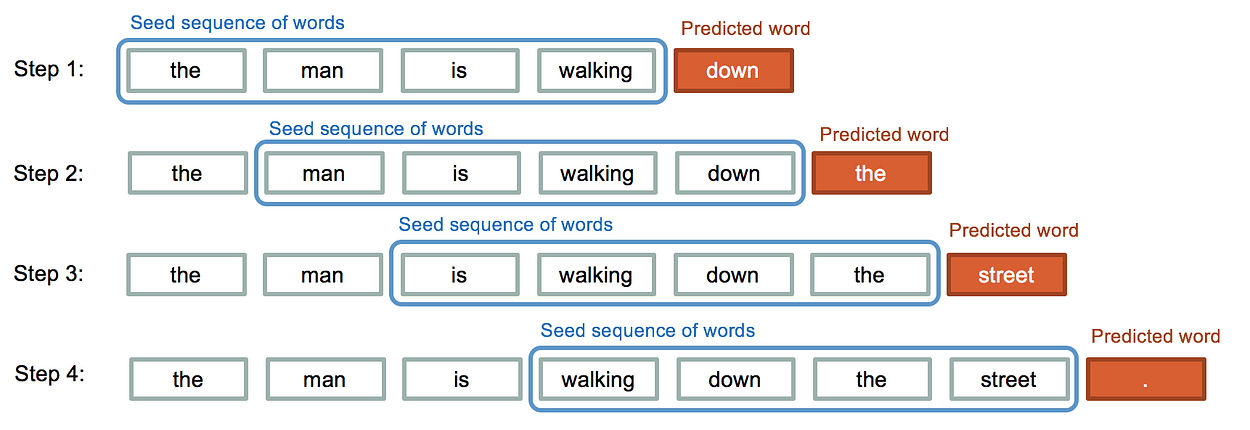

In [28]:
# Convert text to sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    if len(token_list) == 0:  # Skip empty lines
        continue
    #use tokenizer.sequences_to_lists to convert your text into tokens and create a list called token_list
    #create n-grams with length 1,2,3....upto length of token_list and append to input_sequences (Include the word to be predicted)
    for i in range(1, len(token_list) + 1):  # Length 1 to len(token_list)
        n_gram_sequence = token_list[:i]  # Create n-grams of length i
        input_sequences.append(n_gram_sequence)

# Print the generated input_sequences
print("Generated Input Sequences:")
print(input_sequences)

Sample Word Index: [('<OOV>', 1), ('the', 2), ('”', 3), ('and', 4), ('to', 5), ('a', 6), ('she', 7), ('of', 8), ('it', 9), ('said', 10)]
Generated Input Sequences:
[[289], [289, 563], [289, 563, 12], [289, 563, 12, 877], [71], [71, 1595], [71, 1595, 1596], [2], [2, 1597], [2, 1597, 1598], [2, 1597, 1598, 1599], [2, 1597, 1598, 1599, 1600], [2, 1597, 1598, 1599, 1600, 1601], [1602], [177], [177, 15], [177, 15, 36], [177, 15, 36, 2], [177, 15, 36, 2, 89], [177, 15, 36, 2, 89, 630], [177], [177, 1135], [177, 1135, 2], [177, 1135, 2, 349], [177, 1135, 2, 349, 8], [177, 1135, 2, 349, 8, 317], [177], [177, 1136], [177, 1136, 6], [177, 1136, 6, 732], [177, 1136, 6, 732, 498], [177, 1136, 6, 732, 498, 4], [177, 1136, 6, 732, 498, 4, 6], [177, 1136, 6, 732, 498, 4, 6, 132], [177, 1136, 6, 732, 498, 4, 6, 132, 631], [177], [177, 1137], [177, 1137, 2], [177, 1137, 2, 89], [177, 1137, 2, 89, 1138], [177, 1137, 2, 89, 1138, 12], [177, 1137, 2, 89, 1138, 12, 6], [177, 1137, 2, 89, 1138, 12, 6, 30], 

The input_sequences list you got has n-grams of variable length, which isin't very good for training, so we pad the sequences to make them equal in length.

In [29]:
# Pad sequences for equal length
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')


In [30]:
# Create predictors and labels
#Import to_categorical from keras utils
from tensorflow.keras.utils import to_categorical

# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1] #X is sequence of words except the last word, y is the word to be predicted
y = to_categorical(y, num_classes=vocabulary) #Use to_categorical function of Keras to convert target words, specify num_classes


In [31]:
#Create a sequential model with an Embedding layer with vocabulary, dimensions, and input_length as parameters, an LSTM with 100 units, and a Dense layer with softmax activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocabulary_size = len(tokenizer.word_index) + 1   # Vocabulary size (previously calculated)
embedding_dim = 50  # Dimension of embedding vectors
input_length = X.shape[1]  # Length of input sequences
model = Sequential([
    # Embedding Layer
    Embedding(input_dim=vocabulary_size, output_dim=embedding_dim),

    # LSTM Layer with 100 units
    LSTM(units=100, return_sequences=False),  # return_sequences=False since no further LSTM layers follow

    # Dense Layer with softmax activation
    Dense(units=vocabulary_size, activation='softmax')  # Output size matches vocabulary size
])
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [32]:
model.fit(X, y, epochs=25,verbose=2) # increase the number of epochs for better accuracy, decrease for reducing time

Epoch 1/25
868/868 - 41s - 47ms/step - accuracy: 0.0450 - loss: 3.2637e-04
Epoch 2/25
868/868 - 23s - 27ms/step - accuracy: 0.0584 - loss: 3.2637e-04
Epoch 3/25
868/868 - 21s - 25ms/step - accuracy: 0.0584 - loss: 3.2636e-04
Epoch 4/25
868/868 - 42s - 48ms/step - accuracy: 0.0584 - loss: 3.2636e-04
Epoch 5/25
868/868 - 42s - 49ms/step - accuracy: 0.0584 - loss: 3.2635e-04
Epoch 6/25
868/868 - 39s - 45ms/step - accuracy: 0.0584 - loss: 3.2634e-04
Epoch 7/25
868/868 - 24s - 28ms/step - accuracy: 0.0584 - loss: 3.2584e-04
Epoch 8/25
868/868 - 21s - 25ms/step - accuracy: 0.0581 - loss: 3.2415e-04
Epoch 9/25
868/868 - 22s - 26ms/step - accuracy: 0.0574 - loss: 3.2354e-04
Epoch 10/25
868/868 - 40s - 46ms/step - accuracy: 0.0583 - loss: 3.2308e-04
Epoch 11/25
868/868 - 41s - 47ms/step - accuracy: 0.0582 - loss: 3.2169e-04
Epoch 12/25
868/868 - 43s - 49ms/step - accuracy: 0.0638 - loss: 3.2093e-04
Epoch 13/25
868/868 - 40s - 46ms/step - accuracy: 0.0707 - loss: 3.2024e-04
Epoch 14/25
868/868 -

In [33]:
def generate_text(seed_text, next_words, model, max_sequence_len, temperature=1.0):
    for _ in range(next_words):
        # Convert seed_text into tokens
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Perform prepadding on text
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

        # Get model predictions
        predicted_probs = model.predict(token_list, verbose=0)[0]

        # Apply temperature to adjust randomness
        predicted_probs = np.log(predicted_probs + 1e-10) / temperature  # Log for numerical stability
        predicted_probs = np.exp(predicted_probs) / np.sum(np.exp(predicted_probs))  # Softmax normalization

        # Randomly sample based on probabilities
        predicted = np.random.choice(range(len(predicted_probs)), p=predicted_probs)

        output_word = ""
        # Find the corresponding word for the predicted index
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        # Append the predicted word to the seed text
        seed_text += " " + output_word

    return seed_text

# Generate text with a temperature of 0.8 (adjustable)
generated_text = generate_text("Alice was", 20, model, max_sequence_length, temperature=0.8)
print(generated_text)


Alice was her “chorus was that all her rustling make the against it it she was with it was very out was


In [35]:
word_counts = tokenizer.word_counts
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print("Top 10 Most Frequent Words:", sorted_words[:10])


Top 10 Most Frequent Words: [('the', 1620), ('”', 1040), ('and', 795), ('to', 719), ('a', 621), ('she', 535), ('of', 500), ('it', 494), ('said', 459), ('alice', 385)]


In [36]:
loss, acc = model.evaluate(X, y)
print(f"Training Accuracy: {acc * 100:.2f}%")


868/868 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1180 - loss: 3.0776e-04
Training Accuracy: 12.96%


Hey, not bad! There is some coherence in outputted text which matches the style of the input text. Now its your turn to try and make the output make more sense by improving the model. Add more layers, increase the epochs, use a bigger dataset, play around with it! For example, you can load a document which has all the works of shakespeare and see how the output changes.

Do you now have some more respect for poor ChatGPT, which spits highly coherent and verbose sentences in the blink of an eye? Imagine how much training went into that.

Well, if you look at it closely, we're kinda cheating (but not really) by having words in our tokenizer since our model always defaults to a word in the vocab and shows some coherence. If you really wanna get wild, try out character generation and get coherent outputs from that -

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

Starting out, obviously you get a lot of random character wishwash, but many many iterations in, you can see the model truly attempt to capture the word style of the original document.

# Question Answering using RNN




First things first, what are RNN's ?

https://www.youtube.com/watch?v=UNmqTiOnRfg

https://www.youtube.com/watch?v=OuYtk9Ymut4

For the adventurous people who need a challenge in life

https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

So everybody's heard about Sentiment Analysis. We are NOT going to do that here. Well, not in its rudimentary way. For a sentence which we know is positive, the question would essentially be, what part of the sentence is positive, and given the sentence as context, the answer gives you the part of the sentence which caused it to be positive. All possible through the power of RNN's. Let's start.

https://drive.google.com/file/d/1tR82E9MmUpTUdJzrng8z1iVgBlBiX08A/view?usp=drive_link

In [37]:
# write code to load the dataset
df=pd.read_csv('/content/gdrive/MyDrive/ques_ans.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
context_tokenizer = Tokenizer()
#Fit your tokenizer on the text column
context_tokenizer.fit_on_texts(text)
df['selected_text'] = df['selected_text'].astype(str).fillna('')
df['text'] = df['text'].astype(str)
context = context_tokenizer.texts_to_sequences(df['text'])
answers = context_tokenizer.texts_to_sequences(df['selected_text'])

#Finding the beginning and ending position of the answer in the context list
beg_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]
end_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]

In [44]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))
#Do the same for beg_pos and end_pos
beg_pos = np.array(pad_sequences(beg_pos, maxlen=36, padding='post', truncating='post'))
end_pos = np.array(pad_sequences(end_pos, maxlen=36, padding='post', truncating='post'))

# Using numpy, check for rows in 'beg_pos' where all elements are zero
valid_rows = ~np.all(beg_pos == 0, axis=1)

# Filter out rows in the arrays context, beg_pos, and end_pos where 'beg_pos' is all zero
context = context[valid_rows]
beg_pos = beg_pos[valid_rows]
end_pos = end_pos[valid_rows]

# Add a new axis to 'beg_pos' and 'end_pos'
beg_pos = np.expand_dims(beg_pos, axis=2)
end_pos = np.expand_dims(end_pos, axis=2)

# Concatenate 'beg_pos' and 'end_pos' along the third axis, creating a 3D array
ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

((17376, 36), (17376, 36, 1), (17376, 36, 1), (17376, 36, 2))

In [55]:
question_tokenizer = Tokenizer()
question_tokenizer.fit_on_texts(df.sentiment.fillna(''))
question = question_tokenizer.texts_to_sequences(df.sentiment.fillna(''))
# write code to pad sequences for question, like in the previous cell
question = np.array(pad_sequences(question, maxlen=36, padding='post', truncating='post'))

# Filter out rows in the question array where 'beg_pos' is all zero
valid_rows = ~np.all(beg_pos == 0, axis=1)

# Filter out rows in the question array where 'beg_pos' is all zero
question = question[valid_rows]

question.shape

IndexError: boolean index did not match indexed array along dimension 0; dimension is 27481 but corresponding boolean dimension is 17376

In [ ]:
# perform train test split on context, question and ans_vec and print its shape


((23611, 36),
 (2624, 36),
 (23611, 36),
 (2624, 36),
 (23611, 36, 2),
 (2624, 36, 2))

https://keras.io/api/layers/merging_layers/concatenate/

GRU(Gated Recurrent Units) - https://youtu.be/tOuXgORsXJ4?si=BG9l-HXTijxaovHO

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 context (InputLayer)        [(None, 36)]                 0         []                            
                                                                                                  
 question (InputLayer)       [(None, 36)]                 0         []                            
                                                                                                  
 context_embeddings (Embedd  (None, 36, 64)               1702336   ['context[0][0]']             
 ing)                                                                                             
                                                                                                  
 question_embeddings (Embed  (None, 36, 64)               256       ['question[0][0]']        

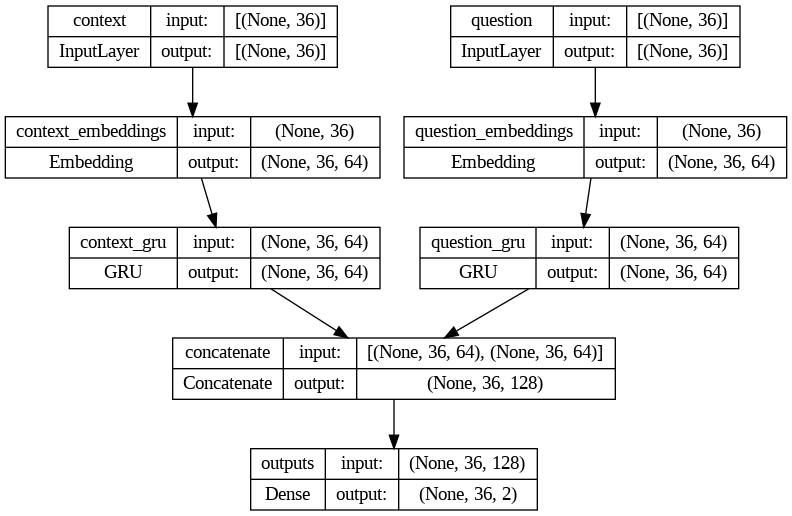

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers as L

EMBED_DIM = 64
N_REC = 64

# create input layers for context_inp and question_input. Name it context and question


context_emb = L.Embedding(len(context_tokenizer.word_index)+1, EMBED_DIM, name='context_embeddings')(context_inp)
question_emb = L.Embedding(len(question_tokenizer.word_index)+1, EMBED_DIM, name='question_embeddings')(question_inp)

# create GRU layers for context_emb and question_emb, keep return_sequences = True


#write code to concatenate these 2 embedding layers, and create a Dense layer for the output


model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
es = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5, verbose=1, restore_best_weights=True)
rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)

# fit the model with train data for [context, question] and ans_vec, and similarly write code for validation data, store it in a variable named 'history'
# do not forget to keep the number of epochs as 25 and the callbacks as es and rlp


Epoch 1/25
738/738 [==============================] - 38s 38ms/step - loss: 0.1764 - val_loss: 0.0836 - lr: 1.0000e-04
Epoch 2/25
738/738 [==============================] - 9s 12ms/step - loss: 0.0809 - val_loss: 0.0748 - lr: 1.0000e-04
Epoch 3/25
738/738 [==============================] - 7s 10ms/step - loss: 0.0703 - val_loss: 0.0628 - lr: 1.0000e-04
Epoch 4/25
738/738 [==============================] - 8s 11ms/step - loss: 0.0578 - val_loss: 0.0526 - lr: 1.0000e-04
Epoch 5/25
738/738 [==============================] - 8s 11ms/step - loss: 0.0492 - val_loss: 0.0488 - lr: 1.0000e-04
Epoch 6/25
738/738 [==============================] - 8s 11ms/step - loss: 0.0457 - val_loss: 0.0483 - lr: 1.0000e-04
Epoch 7/25
738/738 [==============================] - 8s 10ms/step - loss: 0.0437 - val_loss: 0.0484 - lr: 1.0000e-04
Epoch 8/25
738/738 [==============================] - ETA: 0s - loss: 0.0422
Epoch 8: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
738/738 [===========

In [ ]:
idx = 28
query_context = context_valid[idx:idx+1]
query_question = question_valid[idx:idx+1]
query_ans_vec = ans_vec_valid[idx:idx+1]
query_ans_beg, query_ans_end  = np.ravel(ans_vec_valid[idx:idx+1].argmax(axis=1))  #Look into what this does
print('Context:', context_tokenizer.sequences_to_texts(query_context))
print('Question:', question_tokenizer.sequences_to_texts(query_question))
print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

Context: ['benson loved the macaramber']
Question: ['positive']
Answer: ['loved']
Predicted Answer: ['loved']


Just for fun, here is a cell to put custom inputs and predict which part of the sentence matches the question you input.

In [ ]:
def predict_custom_input(custom_context, custom_question):
    # Tokenize and preprocess the custom input
    custom_context_seq = context_tokenizer.texts_to_sequences([custom_context])
    custom_context_padded = np.array(pad_sequences(custom_context_seq, maxlen=36, padding='post', truncating='post'))

    custom_question_seq = question_tokenizer.texts_to_sequences([custom_question])
    custom_question_padded = np.array(pad_sequences(custom_question_seq, maxlen=36, padding='post', truncating='post'))

    # Make predictions using the trained model
    predictions = model.predict([custom_context_padded, custom_question_padded])

    # Extract predicted answer indices
    pred_ans_beg, pred_ans_end = np.ravel(predictions.argmax(axis=1))

    # Convert indices to text
    pred_answer_text = context_tokenizer.sequences_to_texts([custom_context_padded[0][pred_ans_beg: pred_ans_end+1]])

    # Print the results
    print('Custom Input:')
    print('Context:', custom_context)
    print('Question:', custom_question)
    print('Predicted Answer:', pred_answer_text)

# Example usage:
custom_context_input = input("Your custom context goes here.")
custom_question_input = input("Your custom question goes here.")
predict_custom_input(custom_context_input, custom_question_input)


Your custom context goes here.He was feeling so very happy to be there
Your custom question goes here.positive
1/1 [==============================] - 1s 606ms/step
Custom Input:
Context: He was feeling so very happy to be there
Question: positive
Predicted Answer: ['happy']


# <font color='#4879E2'>More resources</font>

Yoav Goldberg's book [Neural Network Methods for Natural Language Processing](http://www.morganclaypool.com/doi/abs/10.2200/S00762ED1V01Y201703HLT037) is a thorough introduction to neural networks for NLP tasks in general.

If you'd like to learn more about what Keras is doing under the hood, there is a [Theano tutorial](http://deeplearning.net/tutorial/lstm.html) that also applies an RNN to sentiment prediction, using the same dataset here

Andrej Karpathy's blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) is very helpful for understanding the mathematical details of an RNN, applied to the task of language modeling. It also provides raw Python code with an implementation of the backpropagation algorithm.

TensorFlow also has an RNN language model [tutorial](https://www.tensorflow.org/versions/r0.12/tutorials/recurrent/index.html) using the Penn Treebank dataset

Chris Olah provides a good [explanation](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) of how LSTM RNNs work (this explanation also applies to the GRU model used here)

Denny Britz's [tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) documents well both the technical details of RNNs and their implementation in Python.

#Compulsory Task

Look into how Name Entity Recognition and Parts of Speech Tagging work and show your research for the same.